In [1]:
from sklearn.datasets import make_moons

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

## Hypothsis(가설)
$$ \frac{1}{1+e^{-(w \cdot x+b)}} $$ 

In [4]:
def sigmoid (z): #-(w*x+b) wx(내적) + b
    return 1.0/(1+ np.exp(-z))


##  손실(Loss)/Cost(비용) 함수
## logistic regression의 cost 함수 =  
$$ j(W,b) = \frac{1}{m}\sum_{i=1}^{m}L(\widehat{y}^{(i)},y^{(i)}) =
   -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\widehat{y}^{(i)} + (l-y^{(i)})log(1-\widehat{y}^{(i)})]
$$

In [5]:
def loss(y, y_hat): #Cross Entropy Loss(y, y^hat)
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

## 경사 하강법(Gradient Descent)
$$ w := w-lr \cdot dw \rightarrow lr = learning rate(학습율) $$
$$ b := b-lr \cdot dw \rightarrow b=bais $$

## 미분 결과
$$ dw = \frac{1}{m} \cdot (\widehat{y}-y) \cdot X $$
$$ db = \frac{1}{m} \cdot (\widehat{y}-y) $$ => Linear Regression의 MSE 미분과 동일

In [6]:
def gradients(X, y, y_hat):
    #x --->입력
    #y --->  정답(target /label)
    #y_hat ---> 가설(모델의 출력 ,hypothesis/예측치(prediction/추정))
    #  w ---> weight (파라미터, theta / 우리가 구하고자 하는 값 )
    # b ---> bias (파라미터 ,theta 0 )
    
    #m --->  학습(trainging ) 데이터의 갯수 
    
    m = X.shape[0]
    
    #Cost(Loss)를 weight로 미분함 
    dw = (1/m)*np.dot(X.T , (y_hat-y))
    
    #Cost(Loss)를 bias로 미분함
    db =  (1/m)*np.sum((y_hat-y))
    
    return dw , db

## 미분 결과
$$ dw = \frac{1}{m} \cdot (\widehat{y}-y) \cdot X $$
$$ db = \frac{1}{m} \cdot (\widehat{y}-y) $$ => Linear Regression의 MSE 미분과 동일

In [7]:
def plot_decision_boundary(X, w , b):
    #X = 입력
    #w = 가중치 
    # b= bais
    
    # 직선 은  y =mx +c
    #그래서 직선의 방정식  mx+ c = w.X + b  
    #m과 c를 풀어라 
    x1= [min(X[:,0 ]) , max(X[:,0])] # X[:,0 ] X의 모든행을 가져오고 0열 선택 
    m= -w[0]/w[1]
    c= -b/w[1]
    x2= m*x1 +c
    
    #그림 그리기 plotting 
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:,0][y==0], X[:,1][y==0],"g^")
    plt.plot(X[:,0][y==1], X[:,1][y==1],"bs")
    plt.xlim([-2,2]) #x 구간 지정 
    plt.ylim([0,2.2]) #ylimit (y 구간지정)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title("Decision Boundary")
    plt.plot(x1, x2 ,'y-')

In [8]:
def normalize(X):
    #X <= 입력
    #m <= training 개수
    #n <= feature 의 갯수 (weight와  내적하는 것)
    m, n = X.shape # (m,n ) m행 n열 
    #X 행렬의 모든  n개의 feature들을 정규화함 
    for i in range(n):
        X = (X -X.mean(axis=0))/X.std(axis=0) 
        #어제 했던 수식(데이터와 평균의 차이를) 포준편차(standard deviation)으로 나눔
    return X


In [9]:
# Train 함수
##  이 함수에서 gradient descent를 반복하여 학습을 하고 weight 와 bais를 구함 
def train(X ,y , bs, epochs ,lr): 
    # X<- 입력
    # y <-  true/ target  
    #epoch는 반복횟수 
    #lr = learning rate(학습율)
    
    #m <- 학습데이터의 수 
    #n <-  feature의 수 
    
    m,n =X.shape
    # weight와 bias 초기화 
    w=np.zeros((n,1))
    b =0
    # y를 reshape함(형태를 맞춤 )
    y = y.reshape(m,1)
    #입력 데이터  normalize 
    x= normalize(X)
    #LOSS를 저장하기 위한 빈 LIST 생성 
    losses =[]
    # 학습 
    for epoch in range(epochs):
        for i in range((m-1)//bs +1):
            #batch 정의 , SGD(Stocastric(통계적0) Gradient Descent)
            start_i = i*bs#bs (배치 사이즈 )
            end_i = start_i +bs
            xb = X[start_i:end_i]
            yb= y[start_i:end_i]
            
            #hypothesis /예측 계산 
            y_hat = sigmoid(np.dot(xb,w ) +b)
            #loss를 파라미터로 미분
            dw, db = gradients(xb, yb, y_hat)
            #파라미터 갱신
            w-= lr*dw
            b -= lr*db
        l= loss(y, sigmoid(np.dot(X,w) +b))
        losses.append(l)
    #weight와 bias, loss 반환 
    return w,b, losses


In [10]:
# 예측 함수 
def predict(X):
    #X<-입력
    #입력 데이터  normalize
    x = normalize(X)
    
    #예측 /추정치/ y_hat 계산
    preds =sigmoid(np.dot(X,w)+b)
    #예측 데이터 저장 리스트 생성 
    pred_class=[]
    #y_hat>=0.5 ->  1로 결과를 출력 
    #y_hat<0.5 ->  0 결과를 출력
    pred_class=[1 if i >0.5 else 0 for i in preds]
    return np.array(pred_class)

## 미분의 정의
$$ \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} $$

In [11]:
def derivative(f, x):
    h=0.00001
    return (f(x+h)-f(x))/h

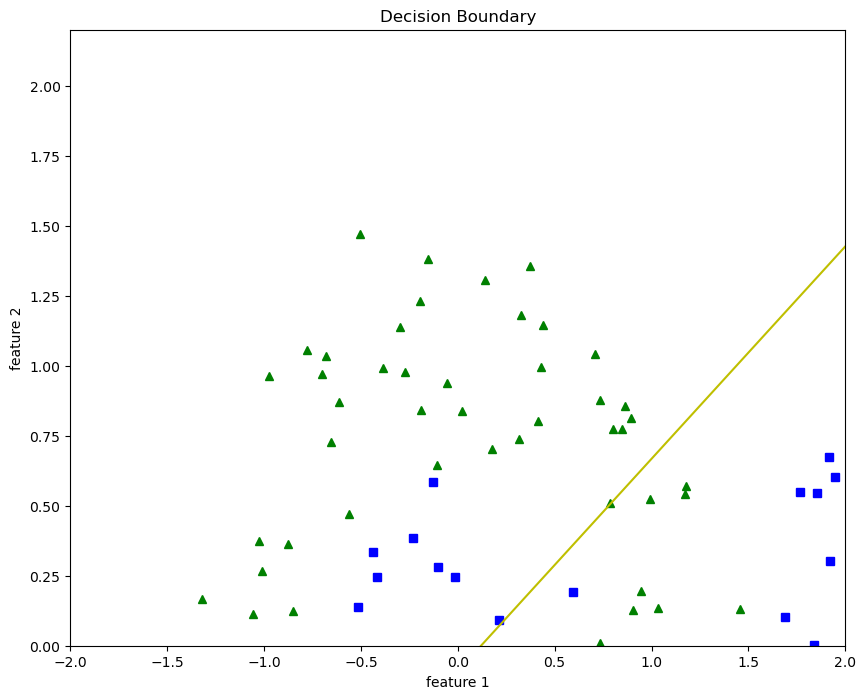

In [12]:
# 학습
X, y =make_moons(n_samples=100, noise=0.24)
w, b, l = train(X,y, bs =100, epochs= 1000, lr= 0.01)
#그림 그리기
plot_decision_boundary(X,w,b)

In [16]:
y_hat=np.array(X[:10][:,0])
np.shape(X_)

(10,)

In [17]:
y_true=[np.random.randint(10) for i in range(10)]
y_true

[8, 2, 2, 8, 7, 7, 4, 5, 7, 3]

##  손실(Loss)/Cost(비용) 함수
## logistic regression의 cost 함수 =  
$$ j(W,b) = \frac{1}{m}\sum_{i=1}^{m}L(\widehat{y}^{(i)},y^{(i)}) =
   -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\widehat{y}^{(i)}) + (1-y^{(i)})log(1-\widehat{y}^{(i)})]
$$

In [18]:
y_true[0]*np.log(np.abs(y_hat[0])) + (1-y_true[0])*np.log(np.abs(1-y_hat[0])) 

-4.113704605776726

In [23]:
result=0
for idx,i in enumerate (y_true):
    result+=i*np.log(np.abs(y_hat[idx]))+ (1-i)*np.log(np.abs(1-y_hat[idx]))
-result/10

1.7263032795647297

In [25]:
cross_entropy=0
for i,j in zip(y_true,y_hat):
    print(i,j)
    cross_entropy += i*np.log(np.abs(j))+(1-i)*np.log(np.abs(1-j))
count = len(y_true)
-cross_entropy/count

8 -1.1849052871748125
2 -0.10525898507370823
2 0.01665465497140399
8 -1.2481697205390998
7 0.8267769276097579
7 0.2898574235198267
4 0.6894265559676123
5 0.6232529179769674
7 2.1460851078250966
3 0.0871752107607511


1.7263032795647297

In [15]:
X,y = make_moons(n_samples=300,noise=0.24)
print('X',np.shape(X)) # 데이터 (100행 2열 행렬)
print('X',np.shape(y)) # 데이터 (100행 벡터)
# 학습 
bs=15
m=20
for epoch in range(10):
    for i in range((m-1)//bs +1):
        #batch 정의 , SGD(Stocastric(통계적0) Gradient Descent)
        start_i = i*bs#bs (배치 사이즈 )
        end_i = start_i +bs
        xb = X[start_i:end_i]
        yb= y[start_i:end_i]
        print('start: ',start_i,', end',end_i,', epoch : ',epoch)

X (300, 2)
X (300,)
start:  0 , end 15 , epoch :  0
start:  15 , end 30 , epoch :  0
start:  0 , end 15 , epoch :  1
start:  15 , end 30 , epoch :  1
start:  0 , end 15 , epoch :  2
start:  15 , end 30 , epoch :  2
start:  0 , end 15 , epoch :  3
start:  15 , end 30 , epoch :  3
start:  0 , end 15 , epoch :  4
start:  15 , end 30 , epoch :  4
start:  0 , end 15 , epoch :  5
start:  15 , end 30 , epoch :  5
start:  0 , end 15 , epoch :  6
start:  15 , end 30 , epoch :  6
start:  0 , end 15 , epoch :  7
start:  15 , end 30 , epoch :  7
start:  0 , end 15 , epoch :  8
start:  15 , end 30 , epoch :  8
start:  0 , end 15 , epoch :  9
start:  15 , end 30 , epoch :  9
